In [ ]:
# --- Import required libraries ---

import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

✅ Loaded benin data: 517860 rows, 19 columns
✅ Loaded sierraleone data: 509308 rows, 19 columns
✅ Loaded togo data: 516349 rows, 19 columns
✅ Combined dataframe shape: (1098, 20)

🌍 Average GHI by Country:
        country         GHI
0        Benin  234.902856
2         Togo  222.685425
1  Sierraleone  183.881858


C:\Users\deres\AppData\Local\Temp\ipykernel_22952\1965261923.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ghi_summary, x="country", y="GHI", palette="viridis")


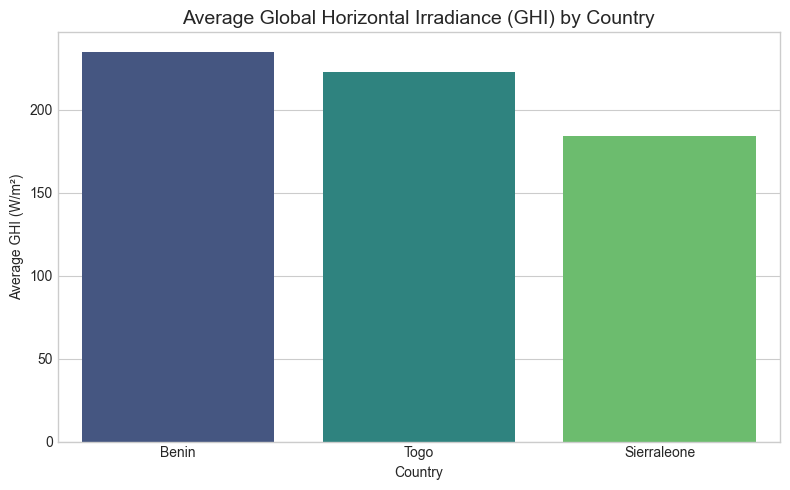

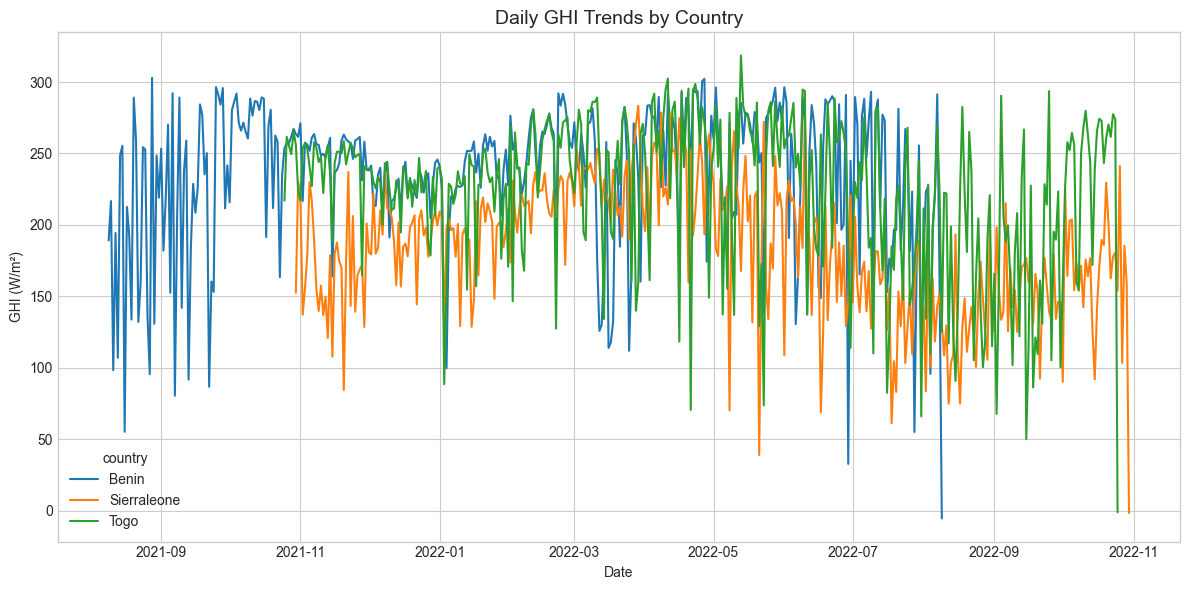

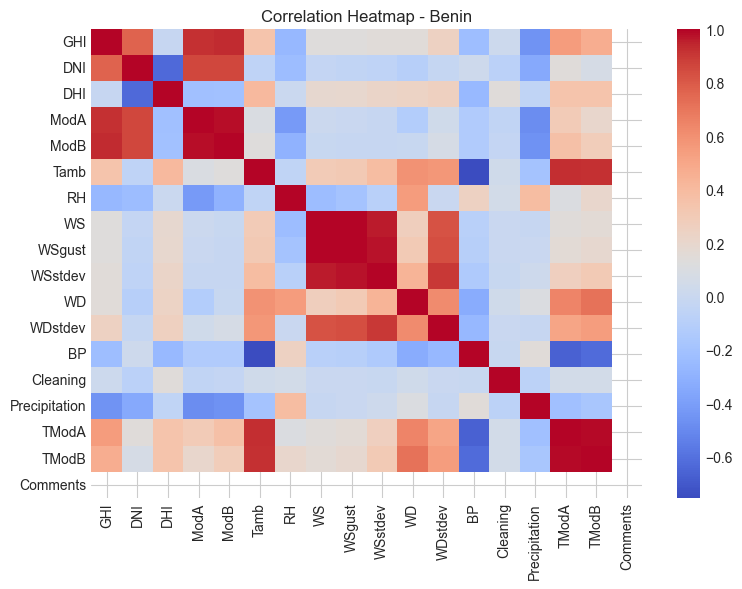

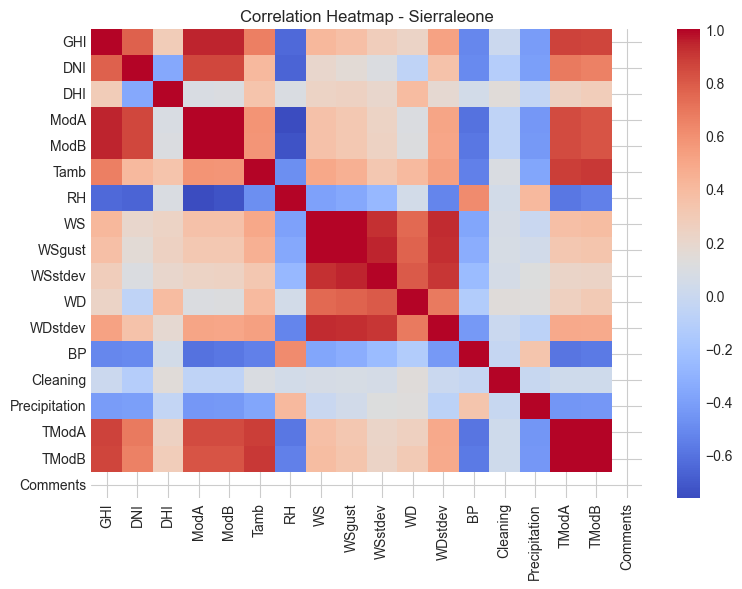

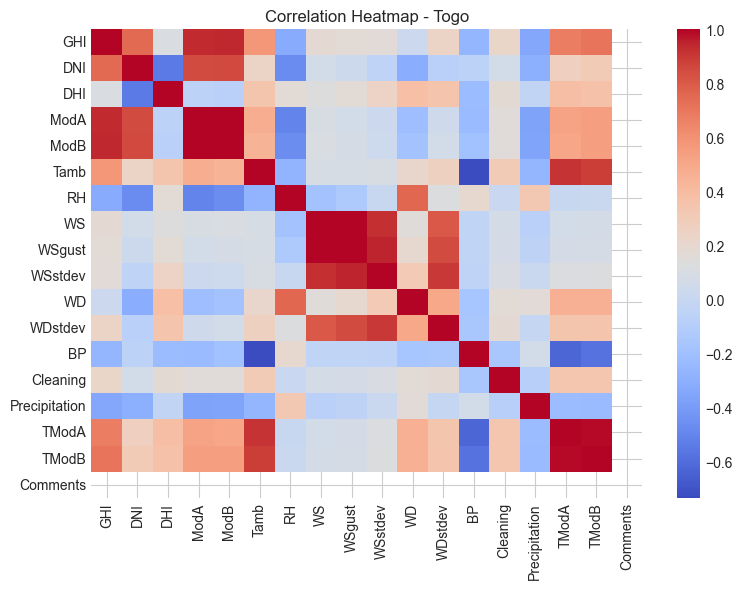

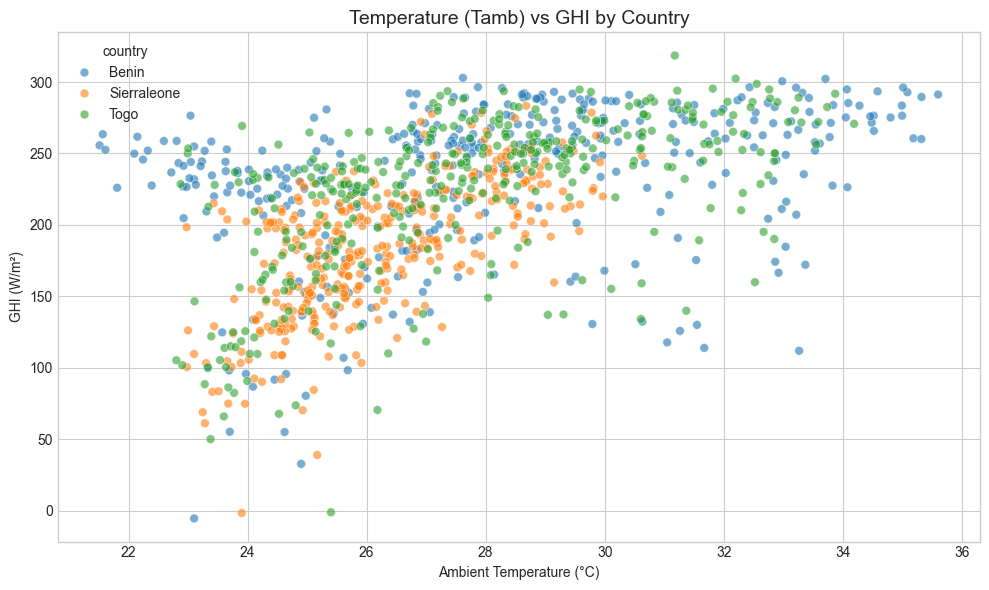

✅ Summary saved to ../outputs/ghi_summary.csv


In [ ]:



# --- Ensure outputs folder exists ---
os.makedirs("../outputs", exist_ok=True)

# --- Define paths to cleaned datasets ---
data_dir = "../data"
files = {
    "benin": os.path.join(data_dir, "benin_clean.csv"),
    "sierraleone": os.path.join(data_dir, "sierraleone_clean.csv"),
    "togo": os.path.join(data_dir, "togo_clean.csv")
}

# --- Read and combine data ---
dfs = []
for country, path in files.items():
    try:
        df = pd.read_csv(path)
        print(f"✅ Loaded {country} data: {df.shape[0]} rows, {df.shape[1]} columns")

        # Try to find a timestamp-like column
        time_col = None
        for col in df.columns:
            if "time" in col.lower() or "date" in col.lower():
                time_col = col
                break

        if time_col is not None:
            df["Timestamp"] = pd.to_datetime(df[time_col], errors="coerce")
            df = df.dropna(subset=["Timestamp"])
            df = df.set_index("Timestamp").sort_index()
        else:
            raise ValueError(f"{country} dataset has no datetime information!")

        # Keep only numeric columns
        numeric_cols = df.select_dtypes(include="number").columns

        # Compute daily averages
        daily = df[numeric_cols].resample("D").mean().reset_index()
        daily["country"] = country.capitalize()
        dfs.append(daily)

    except Exception as e:
        print(f"❌ Error loading {country}: {e}")

# --- Combine all daily dataframes ---
combined = pd.concat(dfs, ignore_index=True)
print("✅ Combined dataframe shape:", combined.shape)

# --- Compare average GHI per country ---
ghi_summary = combined.groupby("country")["GHI"].mean().reset_index().sort_values("GHI", ascending=False)
print("\n🌍 Average GHI by Country:\n", ghi_summary)

# --- Plot 1: Bar chart of mean GHI per country ---
plt.figure(figsize=(8, 5))
sns.barplot(data=ghi_summary, x="country", y="GHI", palette="viridis")
plt.title("Average Global Horizontal Irradiance (GHI) by Country", fontsize=14)
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("Country")
plt.tight_layout()
plt.savefig("../outputs/ghi_comparison.png")
plt.show()

# --- Plot 2: Daily GHI trend comparison ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined, x="Timestamp", y="GHI", hue="country", linewidth=1.5)
plt.title("Daily GHI Trends by Country", fontsize=14)
plt.ylabel("GHI (W/m²)")
plt.xlabel("Date")
plt.tight_layout()
plt.savefig("../outputs/daily_ghi_trend.png")
plt.show()

# --- Plot 3: Correlation heatmaps ---
for ctry in combined["country"].unique():
    subset = combined[combined["country"] == ctry]
    corr = subset.select_dtypes(include="number").corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=False, cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Heatmap - {ctry}")
    plt.tight_layout()
    plt.savefig(f"../outputs/{ctry.lower()}_correlation_heatmap.png")
    plt.show()

# --- Plot 4: Scatter comparison (Temperature vs GHI) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=combined,
    x="Tamb", y="GHI",
    hue="country", alpha=0.6, s=40
)
plt.title("Temperature (Tamb) vs GHI by Country", fontsize=14)
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.tight_layout()
plt.savefig("../outputs/temp_vs_ghi_scatter.png")
plt.show()

# --- Save summary CSV ---
summary_csv_path = "../outputs/ghi_summary.csv"
ghi_summary.to_csv(summary_csv_path, index=False)
print(f"✅ Summary saved to {summary_csv_path}")


C:\Users\deres\AppData\Local\Temp\ipykernel_22952\2710353732.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x="country", y=metric, palette="Set2")


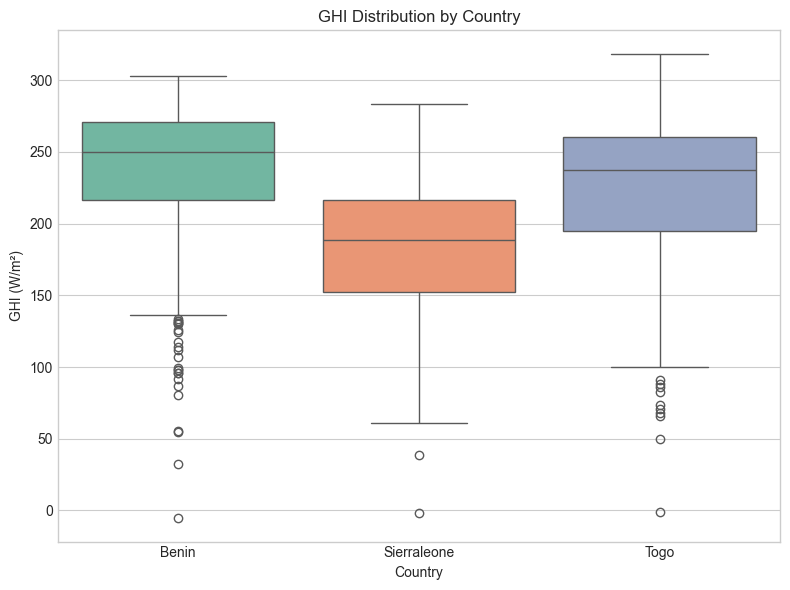

C:\Users\deres\AppData\Local\Temp\ipykernel_22952\2710353732.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x="country", y=metric, palette="Set2")


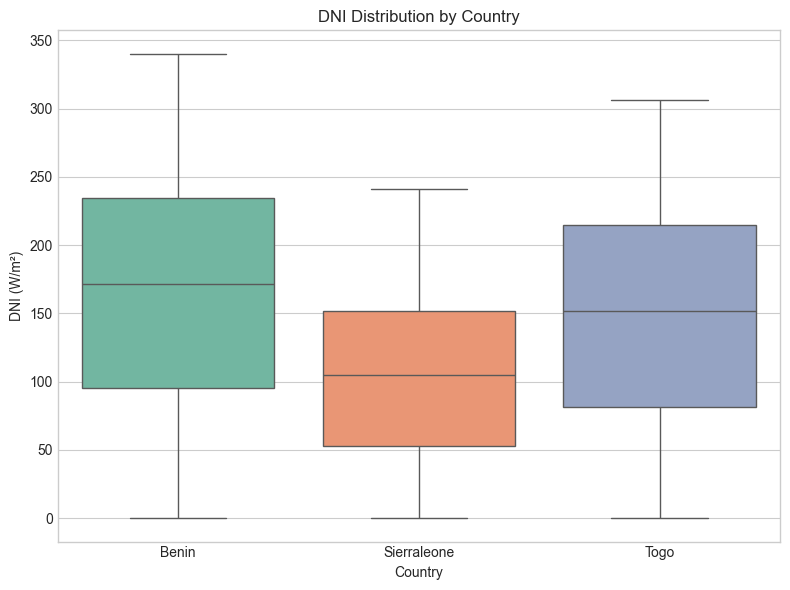

C:\Users\deres\AppData\Local\Temp\ipykernel_22952\2710353732.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x="country", y=metric, palette="Set2")


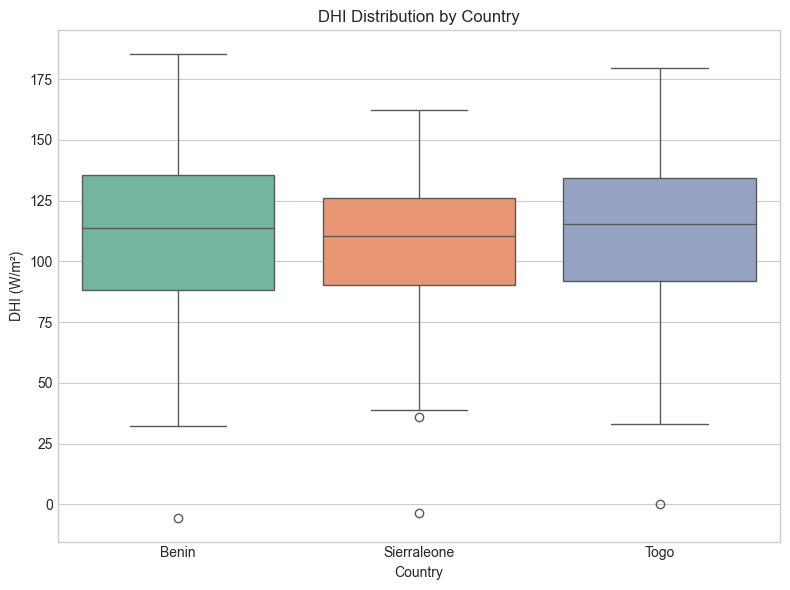

Summary statistics by country:

       country  GHI_mean  GHI_median  GHI_std  DNI_mean  DNI_median  DNI_std  \
0        Benin    234.90      250.22    51.84    165.29      171.45    88.49   
1  Sierraleone    183.88      188.97    46.04    103.50      104.55    61.79   
2         Togo    222.69      237.34    53.93    147.09      152.02    84.25   

   DHI_mean  DHI_median  DHI_std  
0    111.49      113.84    32.36  
1    107.57      110.62    24.99  
2    112.36      115.30    31.07  
✅ Summary statistics saved to ../outputs/metric_summary_stats.csv


In [ ]:


# Assuming 'combined' dataframe is already loaded and processed as before

metrics = ["GHI", "DNI", "DHI"]

# --- Boxplots for each metric ---
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=combined, x="country", y=metric, palette="Set2")
    plt.title(f"{metric} Distribution by Country")
    plt.xlabel("Country")
    plt.ylabel(f"{metric} (W/m²)")
    plt.tight_layout()
    plt.savefig(f"../outputs/{metric.lower()}_boxplot.png")
    plt.show()

# --- Summary statistics table ---
summary_stats = combined.groupby("country")[metrics].agg(['mean', 'median', 'std']).round(2)

# Flatten MultiIndex columns
summary_stats.columns = ['_'.join(col) for col in summary_stats.columns]

summary_stats = summary_stats.reset_index()

print("Summary statistics by country:\n")
print(summary_stats)

# Save summary stats to CSV
summary_stats.to_csv("../outputs/metric_summary_stats.csv", index=False)
print("✅ Summary statistics saved to ../outputs/metric_summary_stats.csv")


In [12]:
from scipy.stats import f_oneway, kruskal

# Extract GHI values for each country
ghi_benin = combined[combined["country"] == "Benin"]["GHI"].dropna()
ghi_sierraleone = combined[combined["country"] == "Sierraleone"]["GHI"].dropna()
ghi_togo = combined[combined["country"] == "Togo"]["GHI"].dropna()

# --- One-way ANOVA ---
anova_result = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)
print("One-way ANOVA result on GHI values:")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4e}")

if anova_result.pvalue < 0.05:
    print("=> The differences in GHI between countries are statistically significant (p < 0.05).")
else:
    print("=> No statistically significant differences in GHI between countries (p >= 0.05).")

# --- Kruskal-Wallis test (non-parametric alternative) ---
kruskal_result = kruskal(ghi_benin, ghi_sierraleone, ghi_togo)
print("\nKruskal-Wallis test result on GHI values:")
print(f"H-statistic: {kruskal_result.statistic:.4f}")
print(f"P-value: {kruskal_result.pvalue:.4e}")

if kruskal_result.pvalue < 0.05:
    print("=> The differences in GHI between countries are statistically significant (p < 0.05).")
else:
    print("=> No statistically significant differences in GHI between countries (p >= 0.05).")


One-way ANOVA result on GHI values:
F-statistic: 100.9899
P-value: 5.6014e-41
=> The differences in GHI between countries are statistically significant (p < 0.05).

Kruskal-Wallis test result on GHI values:
H-statistic: 223.0197
P-value: 3.7314e-49
=> The differences in GHI between countries are statistically significant (p < 0.05).


Key Observations

1.Benin shows the highest median GHI (250.22 W/m²), indicating it generally receives the most consistent solar irradiance among the three countries.

2.Togo exhibits the greatest variability in GHI (std dev = 53.93) and DNI (std dev = 84.25), suggesting more fluctuations in direct and global solar radiation likely due to local climatic factors.

3.Sierraleone has the lowest mean and median values for GHI and DNI, reflecting comparatively lower solar potential in this dataset.

C:\Users\deres\AppData\Local\Temp\ipykernel_22952\1357363683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ghi_summary, x="GHI", y="country", palette="magma", orient='h')


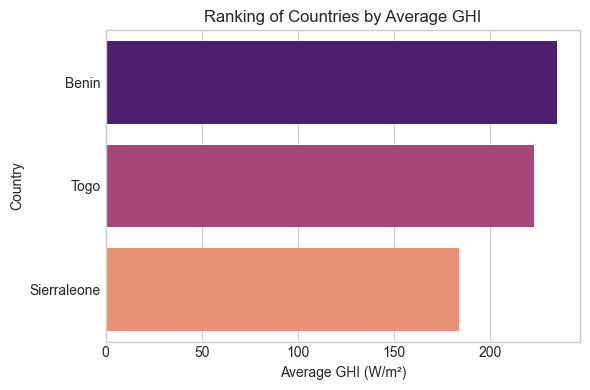

In [13]:
plt.figure(figsize=(6, 4))
sns.barplot(data=ghi_summary, x="GHI", y="country", palette="magma", orient='h')
plt.title("Ranking of Countries by Average GHI")
plt.xlabel("Average GHI (W/m²)")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("../outputs/ghi_ranking_bar.png")
plt.show()
